### Here we test making grid property plots for individual objects.
- star - gas offsets
- BH luminosity
- BH energy injected
- angular momentum / circularity / kappa (i.e. ordered rotation)
- sSFR

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import kin_morph_funcs as knf

In [2]:
path = '/Users/cd201/morphology_misalignment/catalogues/'

# loading in AGN info catalogue.
mass_tab = pd.read_csv(path+'tng100_mpl8_mass_history_wAGN.csv')

# Need to add in mass history to angular momentum table.
ang_tab = pd.read_csv(path+'tng_mpl8_ang_mom_history.csv')

# merging mass and ang mom tables.
merged_tab = mass_tab.merge(ang_tab, left_on=['root_subfind', 'branch_snapnum'], right_on=['root_subfind', 'branch_snapnum'])

In [3]:
# using eyeballed classifications to select subhalo.
tng100_main = pd.read_csv(path+'tng100_mpl8_pa_info_v0.1_z0_info.csv', comment='#')
tng100_pa = knf.tng100_pa_sample(tng100_main)
sel = tng100_pa.subfind_id.values[tng100_pa.pa_offset > 30]

In [4]:
merged_tab.columns

Index(['BH_Mdot', 'BH_mass', 'GasMetallicity', 'SFR', 'branch_snapnum',
       'branch_subfind_x', 'branch_z', 'central_flag', 'gas_mass', 'halo_mass',
       'log10_Lbh_bol', 'log10_Lbh_xray', 'root_snap', 'root_subfind',
       'stel_mass', 'subhalo_mass', 'Unnamed: 0', 'branch_subfind_y',
       'gas_DM_2d', 'gas_DM_3d', 'mag_sJ_DM', 'mag_sJ_gas', 'mag_sJ_stel',
       'root_snapnum', 'stel_DM_2d', 'stel_DM_3d', 'stel_gas_2d',
       'stel_gas_3d'],
      dtype='object')

In [5]:
# selecting a single subhalo.

def return_individual_params(subfind_id):
    mask = (merged_tab.root_subfind.values == subfind_id)
    return merged_tab[mask]

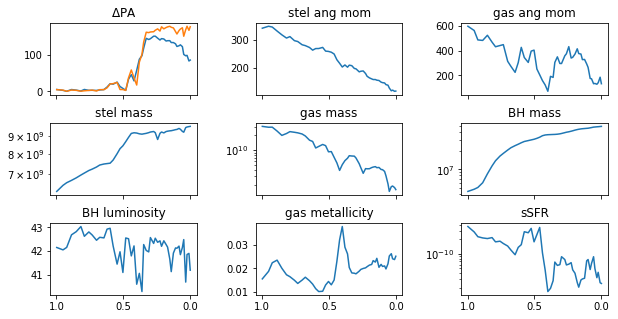

In [6]:
single_tab = return_individual_params(322586)

fig, ax = plt.subplots(3,3, figsize=(10, 5), sharex='all')
ax[0,0].set_title(r'$\Delta$PA')
ax[0,0].plot(single_tab.branch_z.values, single_tab.stel_gas_3d.values)
ax[0,0].plot(single_tab.branch_z.values, single_tab.stel_gas_2d.values)

ax[0,1].set_title(r'stel ang mom')
ax[0,1].plot(single_tab.branch_z.values, single_tab.mag_sJ_stel.values)
#ax[0,1].plot(single_tab.branch_z.values, single_tab.mag_sJ_DM.values)

ax[0,2].set_title(r'gas ang mom')
ax[0,2].plot(single_tab.branch_z.values, single_tab.mag_sJ_gas.values)

ax[1,0].set_title(r'stel mass')
ax[1,0].plot(single_tab.branch_z.values, single_tab.stel_mass.values, label='stel')
ax[1,0].set_yscale('log')

ax[1,1].set_title(r'gas mass')
ax[1,1].plot(single_tab.branch_z.values, single_tab.gas_mass.values, label='gas')
ax[1,1].set_yscale('log')

ax[1,2].set_title('BH mass')
ax[1,2].plot(single_tab.branch_z.values, single_tab.BH_mass.values)
ax[1,2].set_yscale('log')

ax[2,0].set_title('BH luminosity')
#ax[2,0].plot(single_tab.branch_z.values, single_tab.log10_Lbh_bol.values)
ax[2,0].plot(single_tab.branch_z.values, single_tab.log10_Lbh_xray.values)

ax[2,1].set_title(r'gas metallicity')
ax[2,1].plot(single_tab.branch_z.values, single_tab.GasMetallicity.values)

ax[2,2].set_title(r'sSFR')
ax[2,2].plot(single_tab.branch_z.values, single_tab.SFR.values / single_tab.stel_mass.values )
ax[2,2].set_yscale('log')

ax[0,0].invert_xaxis()
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [314]:
# list of possible case studies.
cases = np.array([261968, 322586, 612577, 642463, 236764, 358584, 175245, 617106, 614826, 242228, 493800, 352062, 601914, 466801])
lag_cases = np.array([527378])
no_bhlum_cases = np.array([273147, 286070, 493314, 538295, 322979])
long_mis_cases = np.array([249167, 555540, 502427, 204243, 433040, 445568])
merger_cases = np.array([557675, 424803])